In [28]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix,classification_report,mean_squared_error
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import export_text
import zipfile

In [2]:
with zipfile.ZipFile("D:/downloads/archive (7).zip") as z: 
    with z.open("water_potability.csv") as f:
        df = pd.read_csv(f)

In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


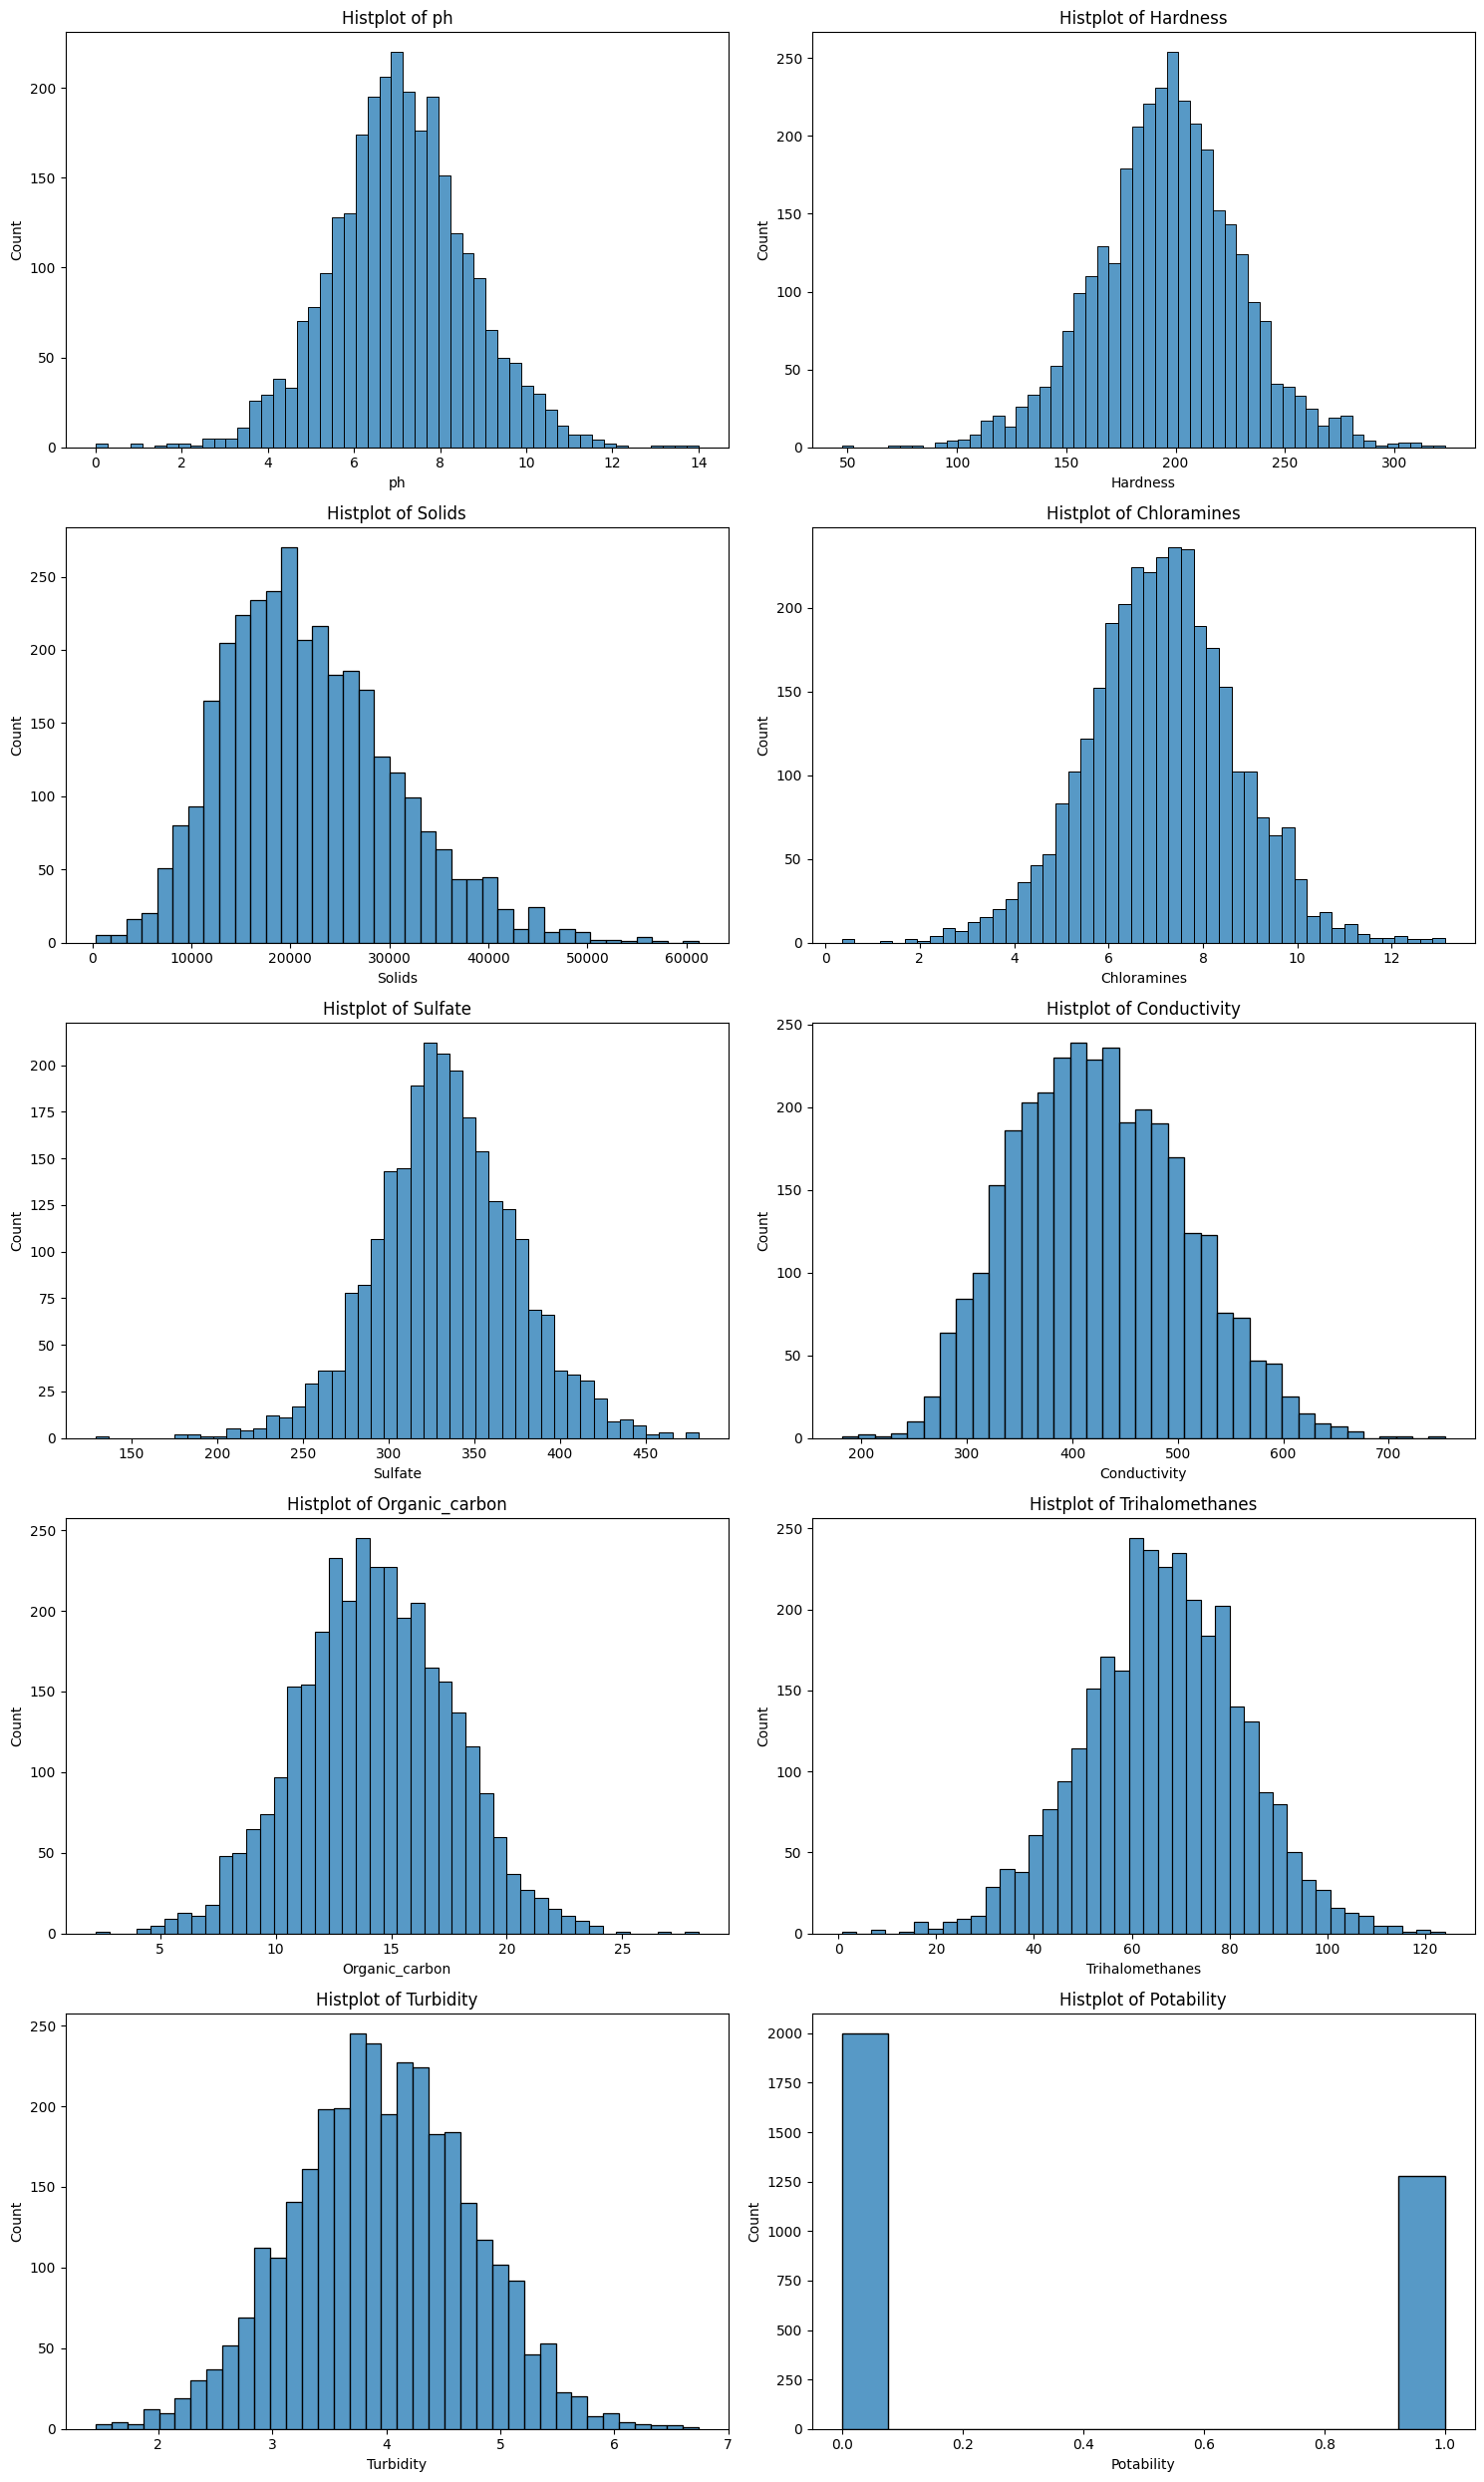

In [8]:
num_cols = len(df.columns)  # Get the number of columns
cols_per_row = 2  # Define how many plots per row
num_rows = (num_cols + cols_per_row - 1) // cols_per_row  # Calculate number of rows needed

# Set up the matplotlib figure
plt.figure(figsize=(15, 5 * num_rows))  # Adjust the figure size based on the number of rows

# Loop through the columns and create a subplot for each
for i, col in enumerate(df.columns, 1):
    plt.subplot(num_rows, cols_per_row, i)  # Create a subplot for each column
    sns.histplot(data=df, x=col)
    plt.title(f'Histplot of {col}')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [9]:
df.columns = df.columns.str.lower()

In [10]:
null_cols = ['ph','sulfate','trihalomethanes']
for col in null_cols: 
    df[col] = df[col].fillna(df[col].mean())

In [41]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

# Resetting indices
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

# Prepare target variables
y_train = np.log1p(df_train.potability.values)
y_test = np.log1p(df_test.potability.values)
y_val = np.log1p(df_val.potability.values)

# Drop the target variable from the feature DataFrames
x_train = df_train.drop(columns=['potability'])
x_test = df_test.drop(columns=['potability'])
x_val = df_val.drop(columns=['potability'])

# Check the shape of result dataframes
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_val shape: {x_val.shape}, y_val shape: {y_val.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

features = ['ph', 'hardness', 'solids', 'chloramines', 'sulfate', 'conductivity','organic_carbon', 'trihalomethanes', 'turbidity']

train_dicts = df_train[features].to_dict(orient='records')
val_dicts  = df_val[features].to_dict(orient='records')

dv = DictVectorizer(sparse=True)
x_train = dv.fit_transform(train_dicts)
x_val = dv.fit_transform(val_dicts)

scores = []
for d in [1,2,3,5,7,9,11,50,100,200]:
    dt = DecisionTreeRegressor(max_depth=d,random_state=1)
    dt.fit(x_train,y_train)
    y_pred = dt.predict(x_val)
    score = np.sqrt(mean_squared_error(y_val,y_pred))
    #accuracy = accuracy_score(y_val,y_pred)
    scores.append((d,score))
df_scores = pd.DataFrame(scores, columns=['max_depth','mse'])
df_scores

x_train shape: (1965, 9), y_train shape: (1965,)
x_val shape: (655, 9), y_val shape: (655,)
x_test shape: (656, 9), y_test shape: (656,)


,max_depth,mse
0,1,0.335152
1,2,0.333971
2,3,0.332383
3,5,0.332034
4,7,0.334572
5,9,0.353443
6,11,0.356629
7,50,0.441719
8,100,0.441719
9,200,0.441719


In [38]:
train_dicts = df_train[features].to_dict(orient='records')
val_dicts  = df_val[features].to_dict(orient='records')
train_dicts[0]

{'ph': 9.82548990813439,
 'hardness': 190.7566182870043,
 'solids': 19677.892465552013,
 'chloramines': 6.757540731413941,
 'sulfate': 333.7757766108135,
 'conductivity': 452.8362348772383,
 'organic_carbon': 16.8990378000164,
 'trihalomethanes': 47.08197118577765,
 'turbidity': 2.857472426051184}

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction import DictVectorizer
import numpy as np
import pandas as pd

# Assuming df is your original DataFrame
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

# Resetting indices
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

# Prepare target variables
y_train = np.log1p(df_train.potability.values)
y_test = np.log1p(df_test.potability.values)
y_val = np.log1p(df_val.potability.values)

# Drop the target variable from the feature DataFrames
x_train = df_train.drop(columns=['potability'])
x_test = df_test.drop(columns=['potability'])
x_val = df_val.drop(columns=['potability'])

# Check the shape of result dataframes
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_val shape: {x_val.shape}, y_val shape: {y_val.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

features = ['ph', 'hardness', 'solids', 'chloramines', 'sulfate', 'conductivity', 'organic_carbon', 'trihalomethanes', 'turbidity']

train_dicts = df_train[features].to_dict(orient='records')
val_dicts = df_val[features].to_dict(orient='records')

dv = DictVectorizer(sparse=True)
x_train = dv.fit_transform(train_dicts)
x_val = dv.transform(val_dicts)  # Use transform here

scores = []
for d in [1, 2, 3, 5, 7, 9, 11, 50, 100, 200]:
    dt = DecisionTreeRegressor(max_depth=d, random_state=1)
    dt.fit(x_train, y_train)
    y_pred = dt.predict(x_val)
    score = np.sqrt(mean_squared_error(y_val, y_pred))  # Use y_val instead of y_test
    scores.append((d, score))

df_scores = pd.DataFrame(scores, columns=['max_depth', 'rmse'])  # Changed 'mse' to 'rmse' for clarity
print(df_scores)

x_train shape: (1965, 9), y_train shape: (1965,)
x_val shape: (655, 9), y_val shape: (655,)
x_test shape: (656, 9), y_test shape: (656,)
   max_depth      rmse
0          1  0.335152
1          2  0.333971
2          3  0.332383
3          5  0.332034
4          7  0.334572
5          9  0.353443
6         11  0.356629
7         50  0.441719
8        100  0.441719
9        200  0.441719


In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [54]:
models = {
    'RandomForest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20, 30]
        }
    },
    'DecisionTree': {
        'model': DecisionTreeRegressor(random_state=42),
        'params': {
            'max_depth': [None, 10, 20, 30]
        }
    },
    'XGBoost': {
        'model': XGBRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [3, 5, 7]
        }
    }
}

In [55]:
results = []

for model_name, model_info in models.items():
    grid_search = GridSearchCV(model_info['model'], model_info['params'], 
                               scoring='neg_root_mean_squared_error', 
                               cv=5, n_jobs=-1, verbose=1)
    
    grid_search.fit(x_train, y_train)
    
    # Append results
    best_params = grid_search.best_params_
    best_rmse = -grid_search.best_score_  # Negate because we used neg_root_mean_squared_error
    results.append({
        'Model': model_name,
        'Best RMSE': best_rmse,
        'Best Params': best_params
    })

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [56]:
results = pd.DataFrame

[{'Model': 'RandomForest',
  'Best RMSE': 0.3219844577564596,
  'Best Params': {'max_depth': 10, 'n_estimators': 200}},
 {'Model': 'DecisionTree',
  'Best RMSE': 0.3628351689912145,
  'Best Params': {'max_depth': 10}},
 {'Model': 'XGBoost',
  'Best RMSE': 0.3327055692163413,
  'Best Params': {'max_depth': 3, 'n_estimators': 50}}]

In [58]:
from tqdm.auto import tqdm
scores = []
for d in tqdm(range(10,201,10)):
    rf = RandomForestRegressor(max_depth=d,n_estimators=200,random_state=1) 
    rf.fit(x_train,y_train)
    y_pred = rf.predict(x_val)
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    scores.append((d, score))

df_scores = pd.DataFrame(scores, columns=['max_depth', 'rmse'])
print(df_scores)

  0%|          | 0/20 [00:00<?, ?it/s]

    max_depth      rmse
0          10  0.317520
1          20  0.319631
2          30  0.320671
3          40  0.320644
4          50  0.320644
5          60  0.320644
6          70  0.320644
7          80  0.320644
8          90  0.320644
9         100  0.320644
10        110  0.320644
11        120  0.320644
12        130  0.320644
13        140  0.320644
14        150  0.320644
15        160  0.320644
16        170  0.320644
17        180  0.320644
18        190  0.320644
19        200  0.320644


In [60]:
scores = []
d = 10
for n in tqdm(range(10,201,10)): 
    rf = RandomForestRegressor(max_depth=d,n_estimators=n,random_state=1) 
    rf.fit(x_train,y_train)
    y_pred = rf.predict(x_val)
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    scores.append((d, n, score))

df_scores = pd.DataFrame(scores, columns=['max_depth','n_estimators', 'rmse'])
print(df_scores.sort_values(by='rmse',ascending=False))

  0%|          | 0/20 [00:00<?, ?it/s]

    max_depth  n_estimators      rmse
0          10            10  0.325388
1          10            20  0.321872
2          10            30  0.320167
3          10            40  0.319246
8          10            90  0.318533
4          10            50  0.318494
7          10            80  0.318435
12         10           130  0.318133
6          10            70  0.318110
5          10            60  0.318097
10         10           110  0.318026
9          10           100  0.318015
11         10           120  0.318007
13         10           140  0.317809
14         10           150  0.317553
19         10           200  0.317520
18         10           190  0.317512
15         10           160  0.317412
16         10           170  0.317311
17         10           180  0.317223


In [61]:
scores = []
for d in tqdm([10, 15, 20, 25]):
    rf = RandomForestRegressor(n_estimators=0,
                               random_state=1,
                               n_jobs=-1,
                               max_depth=d,
                               warm_start=True)
    for n in tqdm(range(10, 201, 10)):
        rf.n_estimators = n
        rf.fit(x_train, y_train)
        y_pred = rf.predict(x_val)
        score = np.sqrt(mean_squared_error(y_val, y_pred))
        scores.append((n, d, score))

df_scores = pd.DataFrame(scores, columns=['n_estimators', 'max_depth', 'mse'])

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

In [64]:
df_scores
pd.set_option('display.max_rows',200)

In [67]:
df_scores.sort_values(by='mse',ascending=True)

,n_estimators,max_depth,mse
17,180,10,0.317223
16,170,10,0.317311
15,160,10,0.317412
18,190,10,0.317512
19,200,10,0.317520
14,150,10,0.317553
37,180,15,0.317643
36,170,15,0.317699
38,190,15,0.317745
13,140,10,0.317809


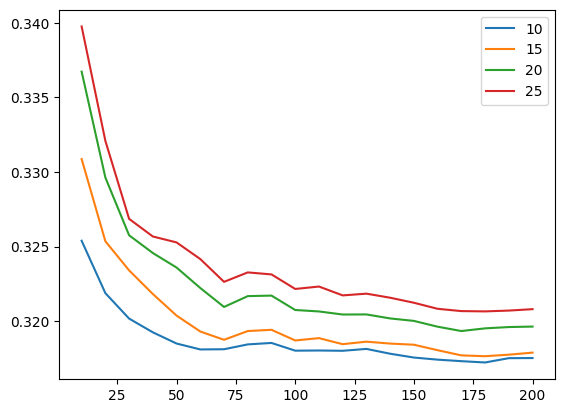

In [70]:
for d in[10,15,20,25]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.mse,label=d)
plt.legend()
plt.show()

In [74]:
train_dicts[0]

{'ph': 9.82548990813439,
 'hardness': 190.7566182870043,
 'solids': 19677.892465552013,
 'chloramines': 6.757540731413941,
 'sulfate': 333.7757766108135,
 'conductivity': 452.8362348772383,
 'organic_carbon': 16.8990378000164,
 'trihalomethanes': 47.08197118577765,
 'turbidity': 2.857472426051184}

In [79]:
scores = []

# Define the ranges for the hyperparameters
max_depths = [10, 15, 20, 25]
min_samples_leaves = [1, 2, 4, 6]  # Example values, adjust as needed
min_samples_splits = [2, 5, 10]     # Example values, adjust as needed
max_features_options = ['sqrt', 'log2']  # Example options

# Loop over max_depth
for d in tqdm(max_depths, desc='Max Depth'):
    # Loop over min_samples_leaf
    for min_samples_leaf in tqdm(min_samples_leaves, desc='Min Samples Leaf', leave=False):
        # Loop over min_samples_split
        for min_samples_split in tqdm(min_samples_splits, desc='Min Samples Split', leave=False):
            # Loop over max_features
            for max_features in tqdm(max_features_options, desc='Max Features', leave=False):
                # Initialize the RandomForestRegressor with warm_start
                rf = RandomForestRegressor(
                    n_estimators=0,
                    random_state=1,
                    n_jobs=-1,
                    max_depth=d,
                    min_samples_leaf=min_samples_leaf,
                    min_samples_split=min_samples_split,
                    max_features=max_features,
                    warm_start=True
                )
                # Loop over n_estimators
                for n in tqdm(range(10, 201, 10), desc='N Estimators', leave=False):
                    rf.n_estimators = n
                    rf.fit(x_train, y_train)
                    y_pred = rf.predict(x_val)
                    score = np.sqrt(mean_squared_error(y_val, y_pred))
                    scores.append((n, d, min_samples_leaf, min_samples_split, max_features, score))

# Create a DataFrame from the scores
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'max_depth', 'min_samples_leaf', 'min_samples_split', 'max_features', 'mse'])

# Display the DataFrame
print(df_scores)

Max Depth:   0%|          | 0/4 [00:00<?, ?it/s]

Min Samples Leaf:   0%|          | 0/4 [00:00<?, ?it/s]

Min Samples Split:   0%|          | 0/3 [00:00<?, ?it/s]

Max Features:   0%|          | 0/2 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

Max Features:   0%|          | 0/2 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

Max Features:   0%|          | 0/2 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

Min Samples Split:   0%|          | 0/3 [00:00<?, ?it/s]

Max Features:   0%|          | 0/2 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

Max Features:   0%|          | 0/2 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

Max Features:   0%|          | 0/2 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

Min Samples Split:   0%|          | 0/3 [00:00<?, ?it/s]

Max Features:   0%|          | 0/2 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

Max Features:   0%|          | 0/2 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

Max Features:   0%|          | 0/2 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

Min Samples Split:   0%|          | 0/3 [00:00<?, ?it/s]

Max Features:   0%|          | 0/2 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

Max Features:   0%|          | 0/2 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

Max Features:   0%|          | 0/2 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

Min Samples Leaf:   0%|          | 0/4 [00:00<?, ?it/s]

Min Samples Split:   0%|          | 0/3 [00:00<?, ?it/s]

Max Features:   0%|          | 0/2 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

Max Features:   0%|          | 0/2 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

Max Features:   0%|          | 0/2 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

Min Samples Split:   0%|          | 0/3 [00:00<?, ?it/s]

Max Features:   0%|          | 0/2 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

Max Features:   0%|          | 0/2 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

Max Features:   0%|          | 0/2 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

Min Samples Split:   0%|          | 0/3 [00:00<?, ?it/s]

Max Features:   0%|          | 0/2 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

Max Features:   0%|          | 0/2 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

Max Features:   0%|          | 0/2 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

Min Samples Split:   0%|          | 0/3 [00:00<?, ?it/s]

Max Features:   0%|          | 0/2 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

Max Features:   0%|          | 0/2 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

Max Features:   0%|          | 0/2 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

Min Samples Leaf:   0%|          | 0/4 [00:00<?, ?it/s]

Min Samples Split:   0%|          | 0/3 [00:00<?, ?it/s]

Max Features:   0%|          | 0/2 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

Max Features:   0%|          | 0/2 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

Max Features:   0%|          | 0/2 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

Min Samples Split:   0%|          | 0/3 [00:00<?, ?it/s]

Max Features:   0%|          | 0/2 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

Max Features:   0%|          | 0/2 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

Max Features:   0%|          | 0/2 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

Min Samples Split:   0%|          | 0/3 [00:00<?, ?it/s]

Max Features:   0%|          | 0/2 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

Max Features:   0%|          | 0/2 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

Max Features:   0%|          | 0/2 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

Min Samples Split:   0%|          | 0/3 [00:00<?, ?it/s]

Max Features:   0%|          | 0/2 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

Max Features:   0%|          | 0/2 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

Max Features:   0%|          | 0/2 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

Min Samples Leaf:   0%|          | 0/4 [00:00<?, ?it/s]

Min Samples Split:   0%|          | 0/3 [00:00<?, ?it/s]

Max Features:   0%|          | 0/2 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

Max Features:   0%|          | 0/2 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

Max Features:   0%|          | 0/2 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

Min Samples Split:   0%|          | 0/3 [00:00<?, ?it/s]

Max Features:   0%|          | 0/2 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

Max Features:   0%|          | 0/2 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

Max Features:   0%|          | 0/2 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

Min Samples Split:   0%|          | 0/3 [00:00<?, ?it/s]

Max Features:   0%|          | 0/2 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

Max Features:   0%|          | 0/2 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

Max Features:   0%|          | 0/2 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

Min Samples Split:   0%|          | 0/3 [00:00<?, ?it/s]

Max Features:   0%|          | 0/2 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

Max Features:   0%|          | 0/2 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

Max Features:   0%|          | 0/2 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

N Estimators:   0%|          | 0/20 [00:00<?, ?it/s]

      n_estimators  max_depth  min_samples_leaf  min_samples_split  \
0               10         10                 1                  2   
1               20         10                 1                  2   
2               30         10                 1                  2   
3               40         10                 1                  2   
4               50         10                 1                  2   
...            ...        ...               ...                ...   
1915           160         25                 6                 10   
1916           170         25                 6                 10   
1917           180         25                 6                 10   
1918           190         25                 6                 10   
1919           200         25                 6                 10   

     max_features       mse  
0            sqrt  0.327242  
1            sqrt  0.323605  
2            sqrt  0.321160  
3            sqrt  0.320537  
4        

In [81]:
df_scores.sort_values(by='mse',ascending=True)

,n_estimators,max_depth,min_samples_leaf,min_samples_split,max_features,mse
1764,50,25,4,10,sqrt,0.316560
1784,50,25,4,10,log2,0.316560
1785,60,25,4,10,log2,0.316661
1765,60,25,4,10,sqrt,0.316661
1766,70,25,4,10,sqrt,0.316793
...,...,...,...,...,...,...
1440,10,25,1,2,sqrt,0.334736
1580,10,25,2,2,log2,0.335415
1560,10,25,2,2,sqrt,0.335415
960,10,20,1,2,sqrt,0.336857


In [82]:
rf = RandomForestRegressor(n_estimators=50,
                           max_depth=25,
                           min_samples_leaf=4,
                           min_samples_split=10,
                           max_features='sqrt',
                           random_state=1,
                           n_jobs=-1) 
rf.fit(x_train,y_train)
y_pred = rf.predict(x_val)
mse = mean_squared_error(y_val,y_pred)
rmse = np.sqrt(mse)
print(f'root mean squared error {rmse}')

root mean squared error 0.31655986307394496


In [83]:
water_potability = {
 'ph': 9.82548990813439,
 'hardness': 190.7566182870043,
 'solids': 19677.892465552013,
 'chloramines': 6.757540731413941,
 'sulfate': 333.7757766108135,
 'conductivity': 452.8362348772383,
 'organic_carbon': 16.8990378000164,
 'trihalomethanes': 47.08197118577765,
 'turbidity': 2.857472426051184
}

In [90]:
x = dv.transform([water_potability])
prediction = rf.predict(x) 
threshold = 0.5
potability = prediction[0] >= threshold

water_sample_id = 'water-230'  
if potability:
    print(f'Water sample id {water_sample_id} is potable water')
else:
    print(f'Water sample id {water_sample_id} is Non-potable water')

Water sample id water-230 is Non-potable water
